# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We need to dummify species, island, and sex

In [6]:
import pandas as pd

penguins = pd.get_dummies(penguins, drop_first=True)
penguins = penguins.dropna()
penguins = penguins.astype(int)

penguins = penguins.dropna()

penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39,18,181,3750,2007,0,0,0,1,1
1,39,17,186,3800,2007,0,0,0,1,0
2,40,18,195,3250,2007,0,0,0,1,0
4,36,19,193,3450,2007,0,0,0,1,0
5,39,20,190,3650,2007,0,0,0,1,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

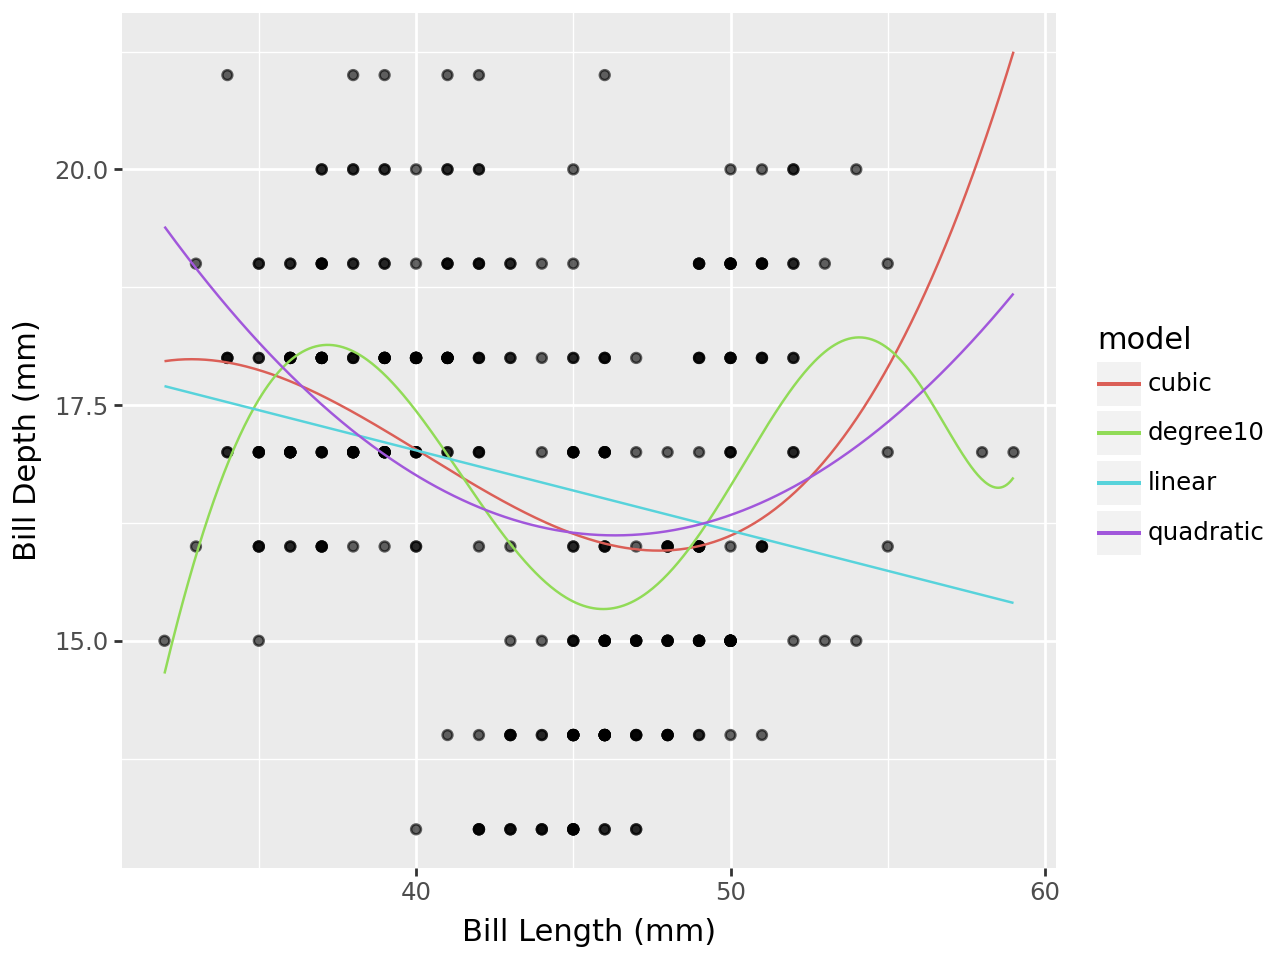

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from plotnine import *

X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"]

x_new = pd.DataFrame({"bill_length_mm": np.linspace(X.min(), X.max(), 500).flatten()}) #help from ChatGPT

def fit_poly(deg):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_new = model.predict(poly.transform(x_new))
    return y_new

y_lin = fit_poly(1)
y_quad = fit_poly(2)
y_cubic = fit_poly(3)
y_deg10 = fit_poly(10)

df_plot = pd.DataFrame({
    "bill_length_mm": x_new["bill_length_mm"],
    "linear": y_lin,
    "quadratic": y_quad,
    "cubic": y_cubic,
    "degree10": y_deg10
})

df_long = df_plot.melt(id_vars="bill_length_mm",
                       var_name="model",
                       value_name="pred")

(ggplot() +
 geom_point(penguins, aes(x="bill_length_mm", y="bill_depth_mm"), alpha=0.6) +
 geom_line(df_long, aes(x="bill_length_mm", y="pred", color="model")) +
 labs(x="Bill Length (mm)", y="Bill Depth (mm)")
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model is underfitting the model, since it is not following the general trend at all. The degree 10 polynomial is overfitting the model, since it changes with every small change in this specific dataset. Out of the above models, cubic model fits the data the best, since it provides a good balance between matching the changes in the data, while still being general enough to not overfit the data and also applicable to other relevent datasets.